In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
simulationProperties = pd.read_csv('./ENB2012_data_f.csv', sep=';')

## Análisis preliminar exploración de la base de datos

In [12]:
print(simulationProperties.sample(5));

       X1     X2     X3      X4   X5  X6    X7  X8     Y1     Y2
617  0.64  784.0  343.0  220.50  3.5   3  0.40   2  18.88  22.07
169  0.74  686.0  245.0  220.50  3.5   3  0.10   3  10.34  13.36
393  0.86  588.0  294.0  147.00  7.0   3  0.25   3  29.40  32.93
339  0.98  514.5  294.0  110.25  7.0   5  0.25   2  28.60  30.02
267  0.74  686.0  245.0  220.50  3.5   5  0.10   5  10.39  13.50


In [13]:
print(simulationProperties['X1'].unique())

[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]


In [14]:
#Valor únicos de las variables
print(simulationProperties.nunique())

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    586
Y2    636
dtype: int64


In [15]:
# Cantidad de valores únicos
for column in simulationProperties.columns:
    unique_values = simulationProperties[column].unique()
    print(f"{column}: {unique_values} (Total: {len(unique_values)})")

X1: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62] (Total: 12)
X2: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5] (Total: 12)
X3: [294.  318.5 343.  416.5 245.  269.5 367.5] (Total: 7)
X4: [110.25 122.5  147.   220.5 ] (Total: 4)
X5: [7.  3.5] (Total: 2)
X6: [2 3 4 5] (Total: 4)
X7: [0.   0.1  0.25 0.4 ] (Total: 4)
X8: [0 1 2 3 4 5] (Total: 6)
Y1: [15.55 20.84 21.46 20.71 19.68 19.5  19.95 19.34 18.31 17.05 17.41 16.95
 15.98 28.52 29.9  29.63 28.75 24.77 23.93  6.07  6.05  6.01  6.04  6.37
  6.4   6.85  6.79  6.77  6.81  7.18  7.1  10.85 10.54 10.77 10.56  8.6
  8.49  8.45  8.5  24.58 24.63 24.59 29.03 29.87 29.14 28.09 26.28 26.91
 26.37 25.27 23.53 24.03 23.54 22.58 35.56 37.12 36.9  35.94 32.96 32.12
 32.94 32.21 10.36 10.43 10.39 10.71 10.8  10.7  10.75 11.11 11.13 11.09
 11.16 11.68 11.69 11.7  15.41 15.2  15.42 15.21 12.96 12.97 12.93 13.02
 24.29 24.31 24.13 24.25 28.88 29.68 28.83 27.9  26.48 27.02 26.33 25.36
 23.75 24.23 23.67 22.79 

In [16]:
#tamaño de la matriz
rows, columns = simulationProperties.shape
print("Número de filas:", rows)
print("Número de columnas:", columns)

Número de filas: 768
Número de columnas: 10


## Correlación

### Información mutua

 La información mutua mide la cantidad de información que una variable tiene sobre otra. Cuanto mayor es la información mutua, mayor es la dependencia entre las dos variables. Se puede usar para variables numéricas y categóricas.

 La información mutua es siempre no negativa. Un valor de 0 indica que las variables son independientes (no hay información compartida), mientras que valores más altos indican mayor dependencia.

Un valor alto de información mutua significa que conocer el valor de una variable da bastante información sobre la otra.
Sin embargo, la información mutua no distingue entre relaciones lineales y no lineales. 
Por lo tanto, incluso si el coeficiente de correlación es bajo, la información mutua puede ser alta debido a relaciones no lineales.

In [17]:
def calculate_entropy(series):
    probs = series.value_counts(normalize=True)
    entropy = -np.sum(probs * np.log(probs))
    return entropy


In [18]:
def calculate_joint_entropy(series1, series2):
    joint_counts = pd.crosstab(series1, series2)
    joint_probs = joint_counts / joint_counts.sum().sum()
    joint_probs = joint_probs.values 
    joint_probs = joint_probs[joint_probs > 0] 
    joint_entropy = -np.sum(joint_probs * np.log(joint_probs))
    return joint_entropy

In [19]:
def im(x, y):
  entropy_x = calculate_entropy(x)
  entropy_y = calculate_entropy(y)
  entropy_x_y = calculate_joint_entropy(x, y)
  im = entropy_x + entropy_y - entropy_x_y
  return im

In [20]:
results = pd.DataFrame(columns=['Variable', 'InformationMutua_Y1', 'InformationMutua_Y2'])
for column in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    im_y1 = 0
    im_y2 = 0
    im_y1 = im(simulationProperties[column], simulationProperties['Y1']) / calculate_entropy(simulationProperties['Y1'])
    im_y2 = im(simulationProperties[column], simulationProperties['Y2']) / calculate_entropy(simulationProperties['Y2'])
    data = {
        'Variable': column,
        'InformationMutua_Y1': round(im_y1,3),
        'InformationMutua_Y2': round(im_y2,3)
    }
    # Agregar los resultados al dataframe
    results = results._append(data, ignore_index=True)

print(results)

/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T/ipykernel_96188/3248789102.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = results._append(data, ignore_index=True)


  Variable  InformationMutua_Y1  InformationMutua_Y2
0       X1                0.371                0.365
1       X2                0.371                0.365
2       X3                0.266                0.263
3       X4                0.185                0.181
4       X5                0.110                0.109
5       X6                0.179                0.189
6       X7                0.183                0.189
7       X8                0.236                0.243


### Coeficiente de Spearman

 Spearman mide la correlación entre dos variables según sus rangos. Se usa cuando la relación entre variables no es necesariamente lineal, o cuando las variables contienen datos ordinales o no normalmente distribuidos.

Va de -1 a 1. Un valor de 1 indica una correlación positiva perfecta (a medida que una variable aumenta, la otra también), -1 indica una correlación negativa perfecta (a medida que una variable aumenta, la otra disminuye), y 0 indica que no hay correlación.

Valor p: Indica la significancia estadística del coeficiente de Spearman. Un valor p pequeño (por ejemplo, menor que 0.05) sugiere que la correlación es significativa y no debida al azar.

In [21]:
from scipy.stats import spearmanr

In [22]:
# Correlación de Spearman y valor p entre variables de entrada y Y1
spearman_Y1 = []
for column in ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]:
    correlation, p_value = spearmanr(simulationProperties[column], simulationProperties["Y1"])
    spearman_Y1.append((correlation, p_value))

spearman_with_Y1 = pd.DataFrame(spearman_Y1, index=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"], columns=["Correlación", "Valor p"])
print("Correlación de Spearman y valor p con Y1:")
print(spearman_with_Y1)

Correlación de Spearman y valor p con Y1:
    Correlación        Valor p
X1     0.622135   1.771224e-83
X2    -0.622135   1.771224e-83
X3     0.471458   9.359216e-44
X4    -0.804027  4.039675e-175
X5     0.861283  1.989000e-227
X6    -0.004163   9.083001e-01
X7     0.322860   4.320873e-20
X8     0.068343   5.834211e-02


Valor p de 0.908: Este es un valor p alto. Significa que hay una alta probabilidad de que la correlación observada sea producto del azar. No se puede afirmar que existe una correlación estadísticamente significativa.

Valor p de 0.058: Este valor está cerca del límite usualmente aceptado (0.05). Aunque técnicamente no es significativo, se acerca bastante a serlo. En este caso, se podría decir que la correlación es marginalmente significativa o que se necesita más evidencia para concluir con certeza.

In [23]:
# Correlación de Spearman y valor p entre variables de entrada y Y2
spearman_Y2 = []
for column in ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]:
    correlation, p_value = spearmanr(simulationProperties[column], simulationProperties["Y2"])
    spearman_Y2.append((correlation, p_value))

spearman_with_Y2 = pd.DataFrame(spearman_Y2, index=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"], columns=["Correlación", "Valor p"])
print("Correlación de Spearman y valor p con Y2:")
print(spearman_with_Y2)

Correlación de Spearman y valor p con Y2:
    Correlación        Valor p
X1     0.651019   8.654994e-94
X2    -0.651019   8.654994e-94
X3     0.415991   1.709338e-33
X4    -0.803175  1.778790e-174
X5     0.864876  1.786091e-231
X6     0.017606   6.261545e-01
X7     0.288904   3.132343e-16
X8     0.046477   1.982317e-01


Valor p de 0.626: Este es un valor p alto, lo que sugiere que la correlación entre las dos variables no es estadísticamente significativa. Indica que la correlación observada podría ser resultado del azar o la variabilidad del muestreo.

Valor p de 0.198: Aunque este valor es más bajo que el anterior, sigue siendo mayor que el nivel comúnmente aceptado de significancia (0.05). Esto significa que la correlación no es estadísticamente significativa, pero puede haber cierta tendencia o indicio de correlación.

### Matriz de correlación

In [24]:
firstProperties = simulationProperties.iloc[:, :8]
correlationMatrix = simulationProperties.corr(method="spearman")
pd.options.display.float_format = "{:.3f}".format

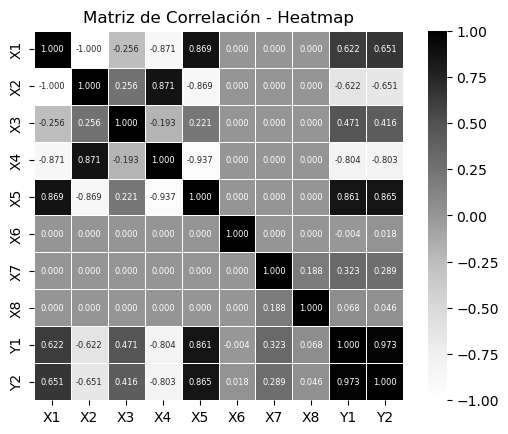

In [25]:
sns.heatmap(correlationMatrix, fmt=".3f", square=True, annot_kws={'size': 6}, linewidth=.5, cmap='Greys', cbar=True, annot=True)
plt.title("Matriz de Correlación - Heatmap")
plt.savefig("heatmap.png") 
plt.show() 

## Análisis de componentes principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = simulationProperties[['Y1', 'Y2']]

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(X_norm)

PCA()

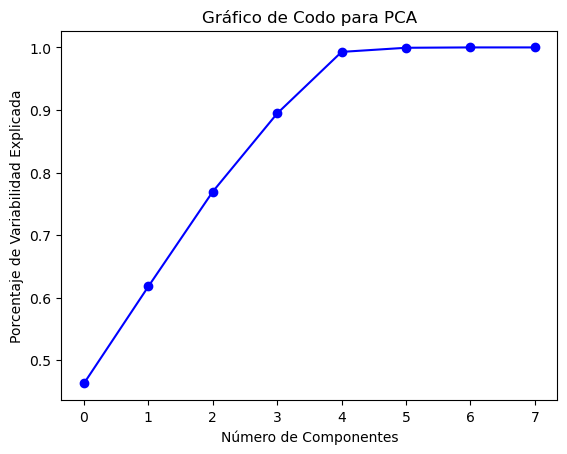

In [ ]:
# Graficar la variabilidad explicada por cada componente
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Porcentaje de Variabilidad Explicada')
plt.title('Gráfico de Codo para PCA')
plt.show()

In [ ]:
explained_variance_percentage = pca.explained_variance_ratio_ * 100

explained_variance_df = pd.DataFrame(
    {
        'Componente': [f'PC{i + 1}' for i in range(len(explained_variance_percentage))],
        'Proporción de Varianza (%)': explained_variance_percentage,
    }
)
explained_variance_df['Proporción de Varianza (%)'] = explained_variance_df['Proporción de Varianza (%)'].apply(lambda x: round(x, 2))
print(explained_variance_df)

  Componente  Proporción de Varianza (%)
0        PC1                       46.29
1        PC2                       15.50
2        PC3                       15.16
3        PC4                       12.50
4        PC5                        9.84
5        PC6                        0.66
6        PC7                        0.06
7        PC8                        0.00


In [ ]:
num_components = 5
pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X_norm)

# Convertir las nuevas componentes a un DataFrame de pandas
X_reduced_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Exportar las nuevas componentes a un archivo CSV
X_reduced_df.to_csv('X_reduced.csv', index=False)


In [ ]:
rotation_matrix = pca.components_

variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']  # Nombres de tus variables originales
rotation_df = pd.DataFrame(rotation_matrix.T, columns=[f'PC{i + 1}' for i in range(5)], index=variables)
rotation_df.to_csv('rotation_matrix.csv', index=False)

rotation_df_rounded = rotation_df.round(2)

print(rotation_df_rounded)


     PC1   PC2   PC3  PC4   PC5
X1  0.50 -0.24 -0.00  0.0 -0.00
X2 -0.50  0.23 -0.00 -0.0  0.00
X3  0.03  0.89 -0.00 -0.0  0.00
X4 -0.50 -0.21 -0.00  0.0 -0.00
X5  0.50  0.21 -0.00  0.0  0.00
X6 -0.00  0.00 -0.00  1.0 -0.00
X7 -0.00 -0.00 -0.71 -0.0 -0.71
X8 -0.00 -0.00 -0.71  0.0  0.71


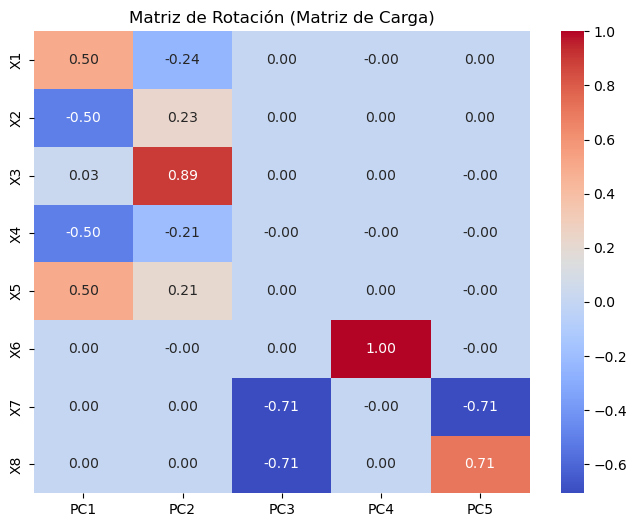

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(rotation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Rotación (Matriz de Carga)')
plt.show()

[[ 3.12895415 -0.90237343]
 [ 3.12895415 -0.90237343]
 [ 3.12895415 -0.90237343]
 ...
 [-2.40682619  1.28785724]
 [-2.40682619  1.28785724]
 [-2.40682619  1.28785724]]


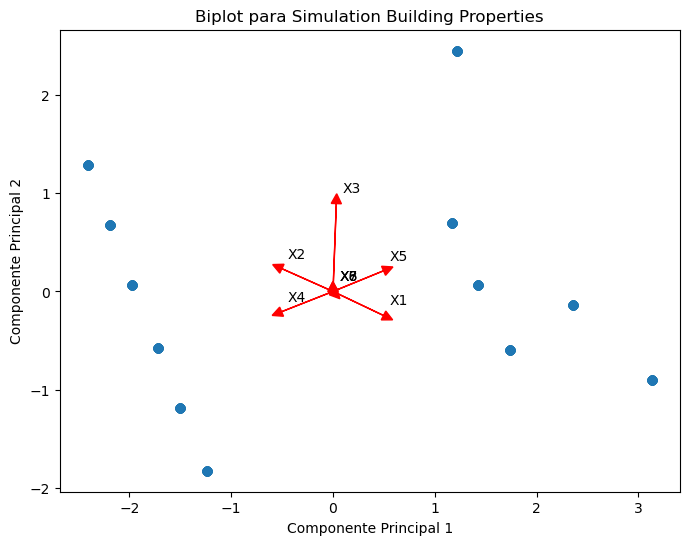

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

print(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Observaciones')

loadings = pca.components_.T 

for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', head_width=0.1, head_length=0.1)
    offset = 0.15
    plt.text(
        loadings[i, 0] + offset,
        loadings[i, 1] + offset,
        var,
        color='black',
        ha='center',
        va='center',
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot para Simulation Building Properties')
plt.show()